In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
test = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")

In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# **Data exploration**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [7]:
cat = []
val = []
for i in df.columns:
    if len(df[i].unique()) < 10:
        cat.append(i)
    else:
        val.append(i)
    print(i,len(df[i].unique()))
        
print(cat)
print(val)

battery_power 1094
blue 2
clock_speed 26
dual_sim 2
fc 20
four_g 2
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 1137
px_width 1109
ram 1562
sc_h 15
sc_w 19
talk_time 19
three_g 2
touch_screen 2
wifi 2
price_range 4
['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [8]:
let = []
a = []

for i in cat:
    let.append(len(df[i].unique()))
    a.append(df[i].unique())
a = list(zip(let,a))
pd.DataFrame(data = a,columns=['Number of Unique values','Unique Values'],index=cat)

,Number of Unique values,Unique Values
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"
price_range,4,"[1, 2, 3, 0]"


In [9]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
df[val].describe().T


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.21300,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0


In [10]:
df.corr()['price_range'].sort_values()

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

## Cleaning Data

In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
df.duplicated().sum()

0

## Data Visualisation


<AxesSubplot:>

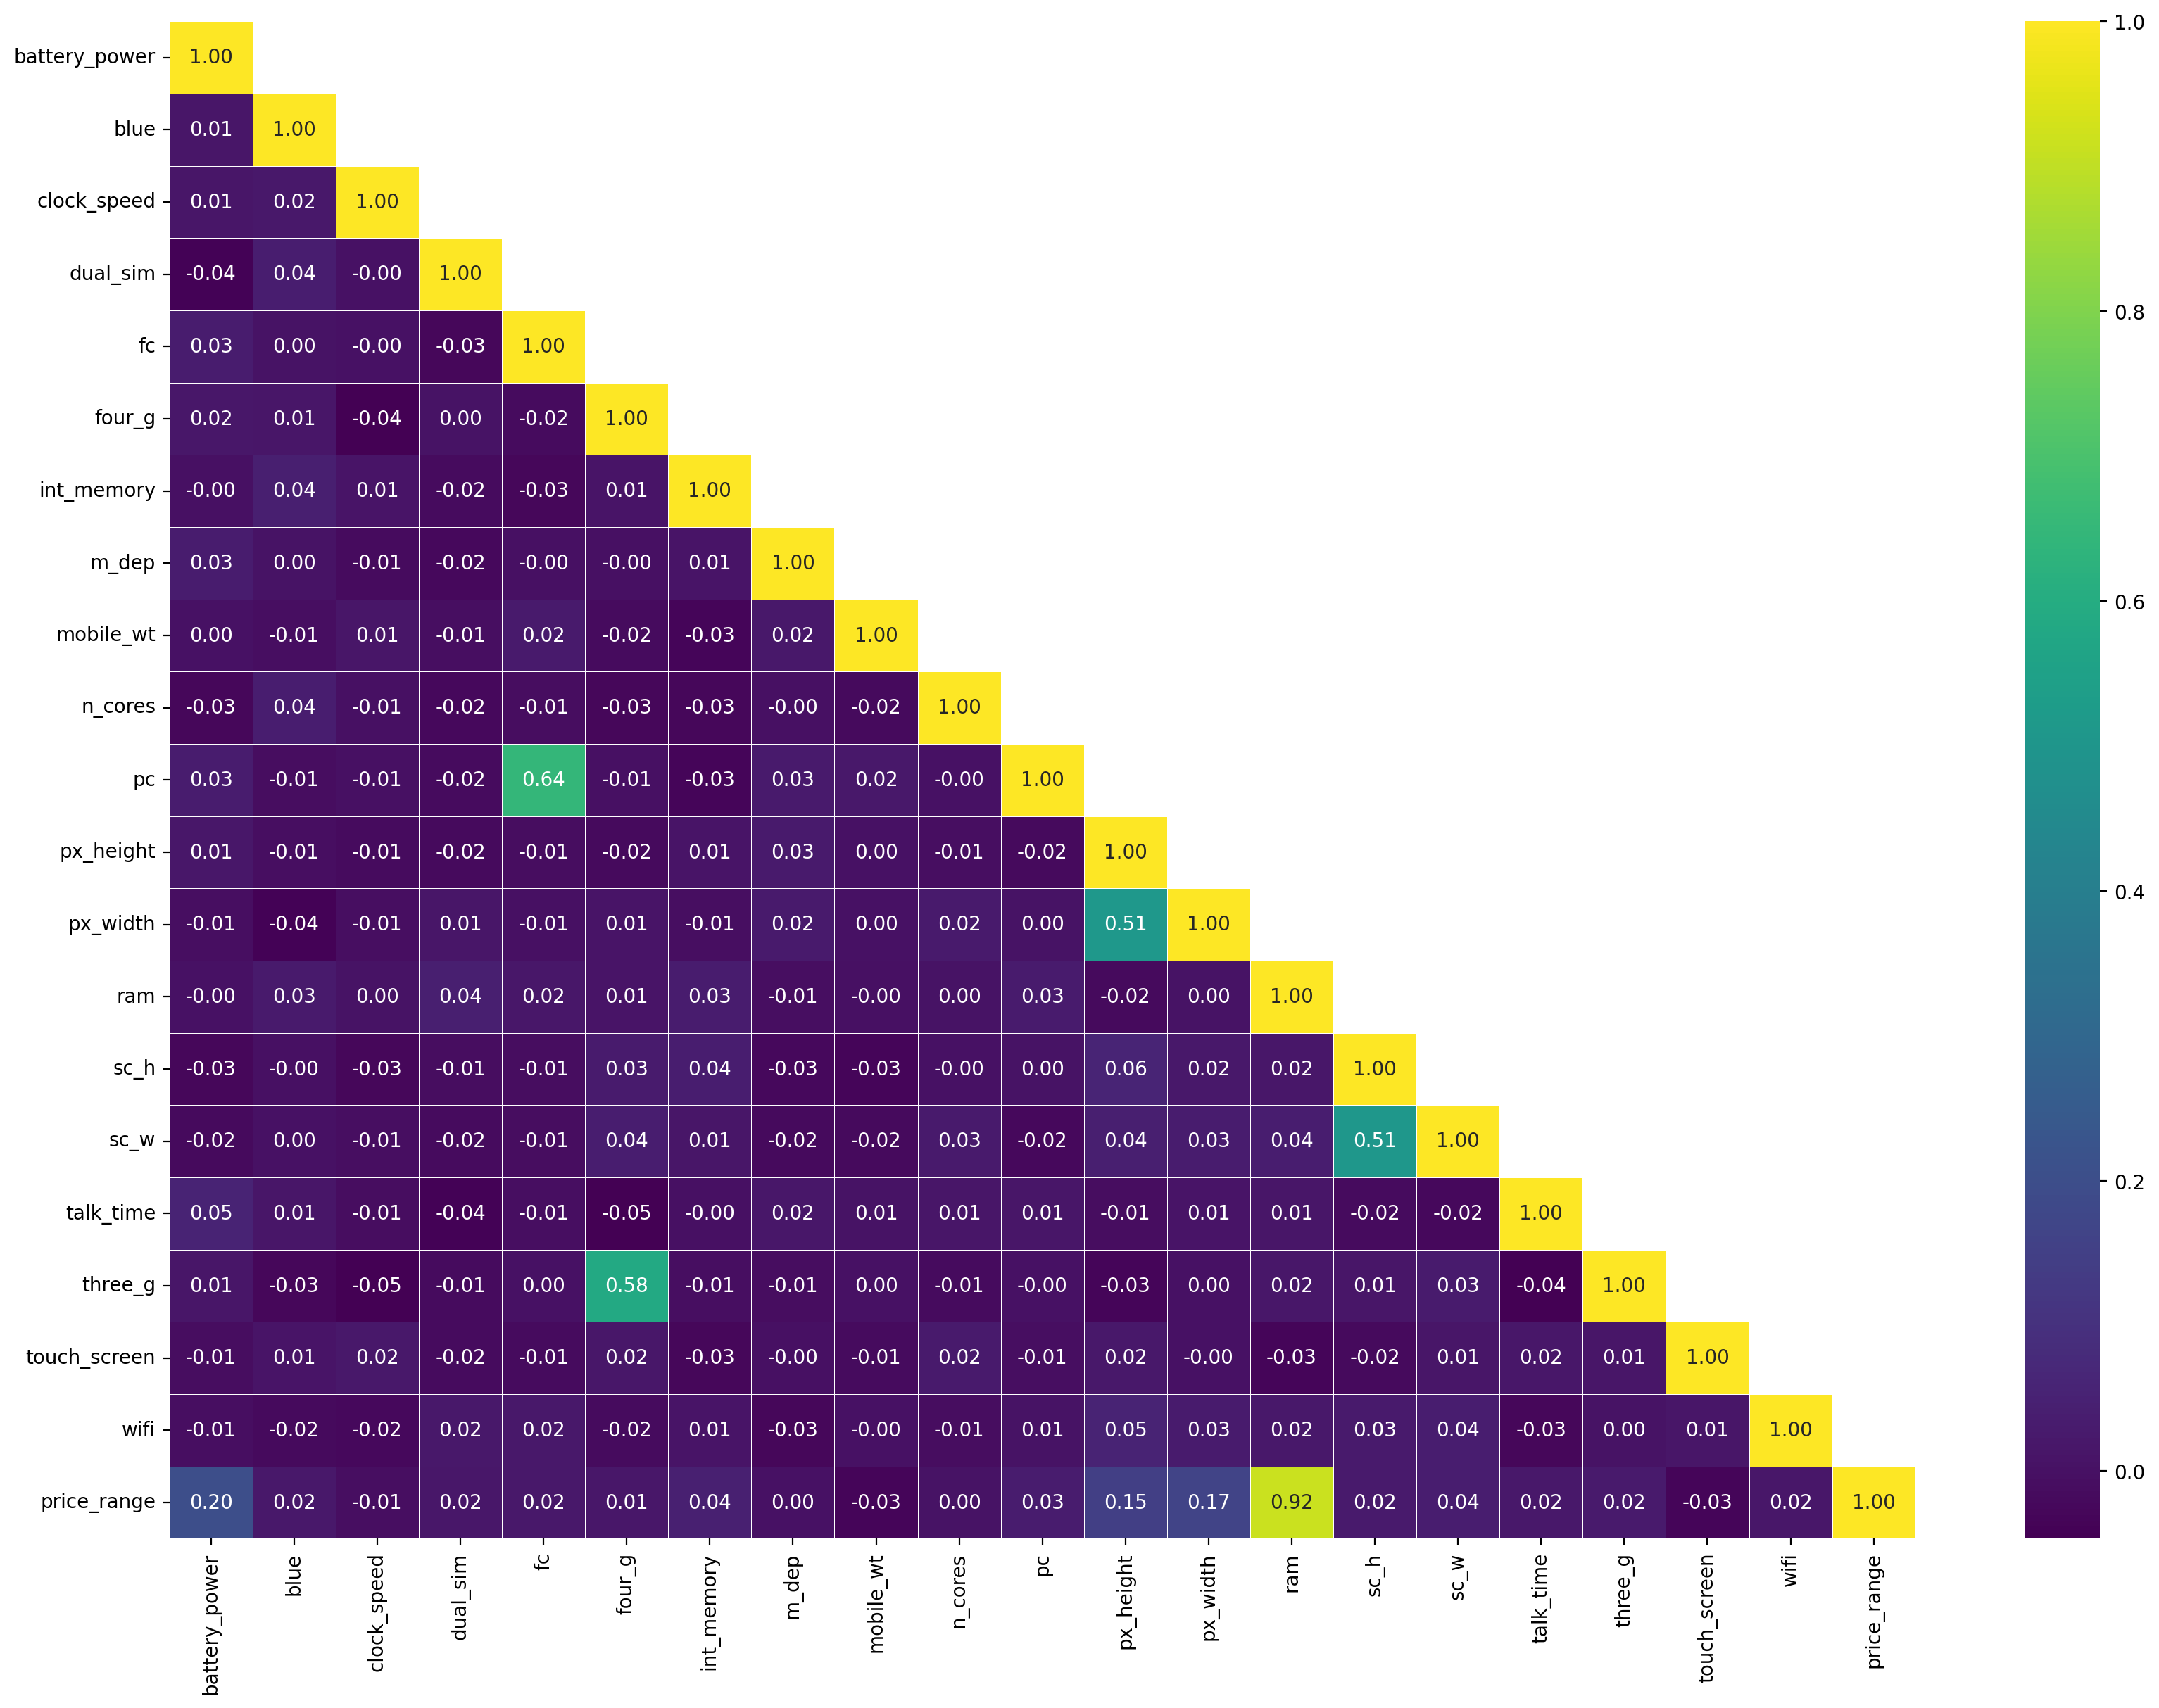

In [13]:
plt.figure(figsize=(20,14),dpi = 200)
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask, k=1)] = True
sns.heatmap(df.corr(),mask = mask,cmap = "viridis",annot = True,fmt = ".2f",linewidths=0.2)

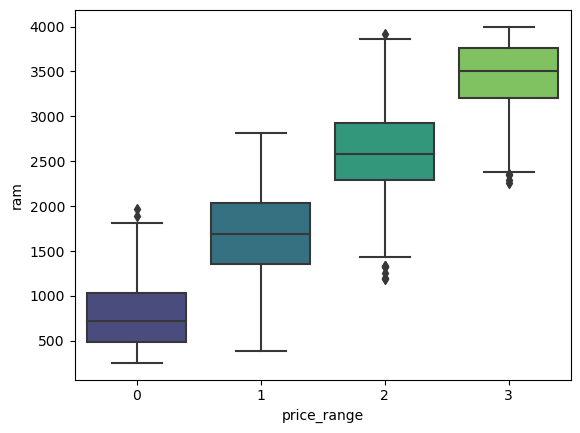

In [14]:
sns.boxplot(x = 'price_range',y = "ram", data = df,palette= 'viridis');

<AxesSubplot:>

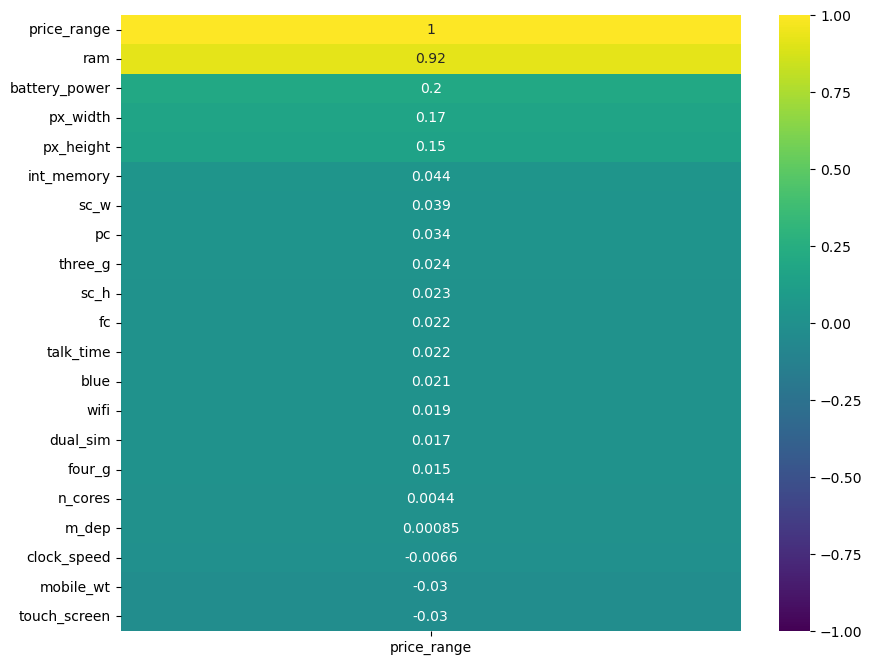

In [15]:
plt.figure(figsize = (10,8),dpi = 100)
data = df.corr()[['price_range']].sort_values(by = 'price_range',ascending= False)
sns.heatmap(data,annot = True,vmax= 1,vmin = -1,cmap='viridis') 

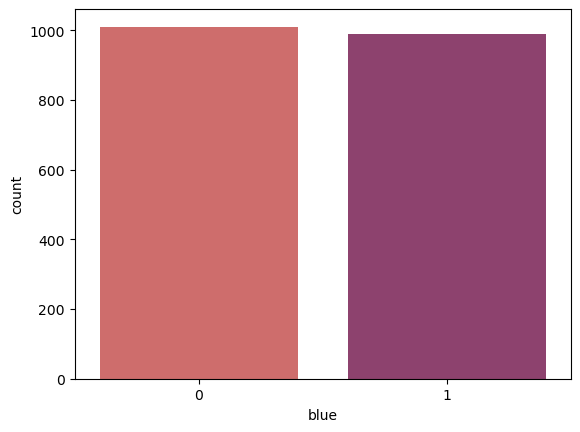

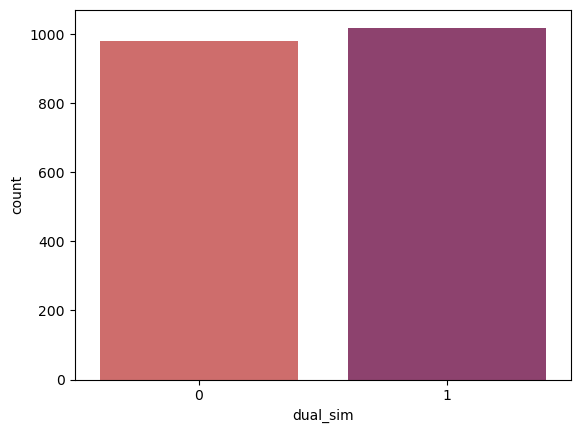

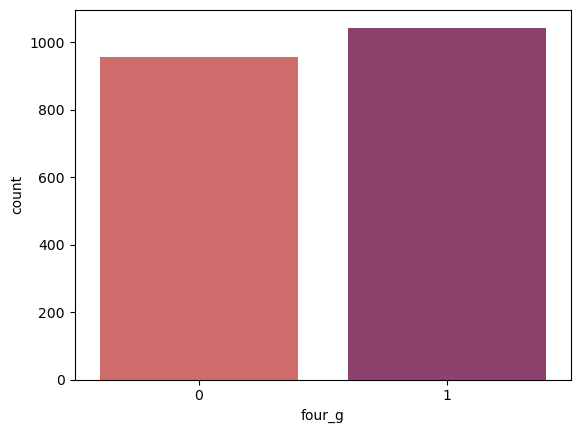

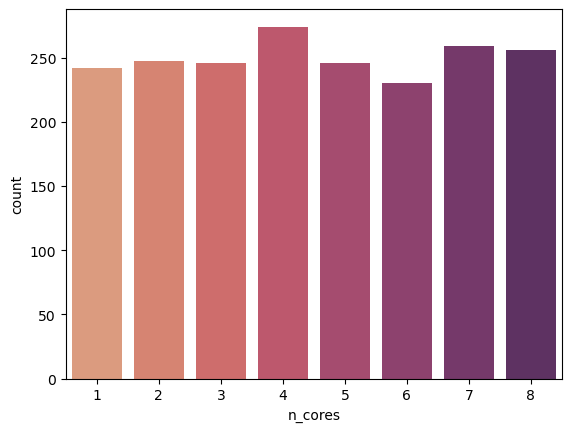

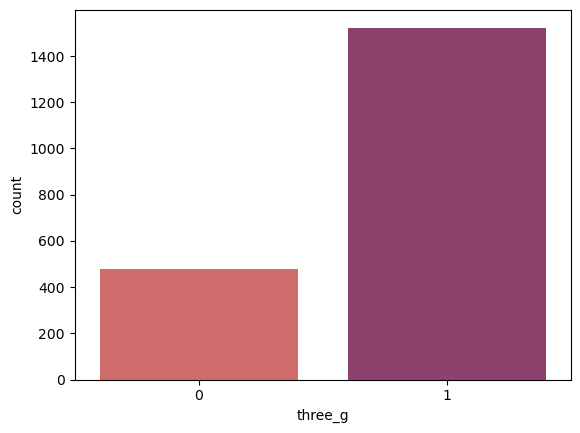

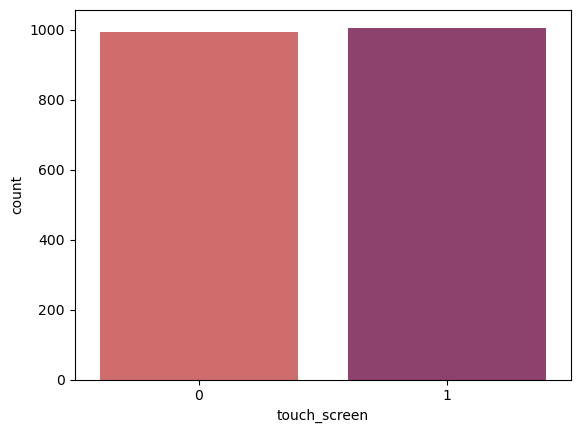

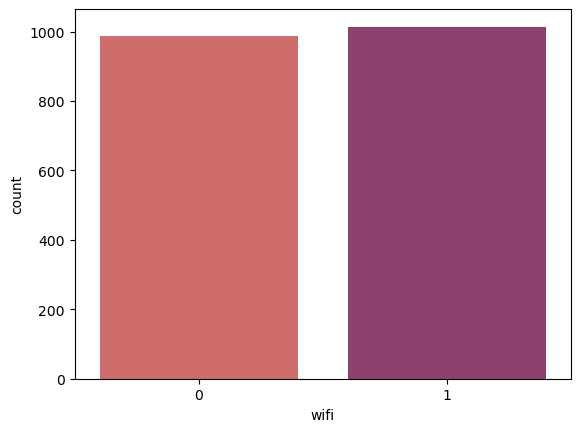

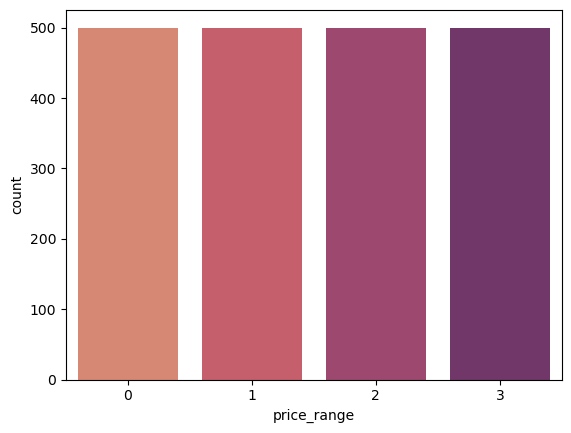

In [16]:
for i in cat:
    sns.countplot(x = i, data = df,palette="flare")
    plt.show()

In [17]:
cat.remove("price_range")

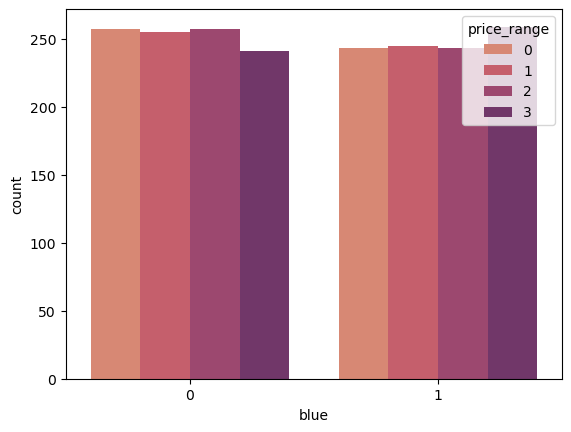

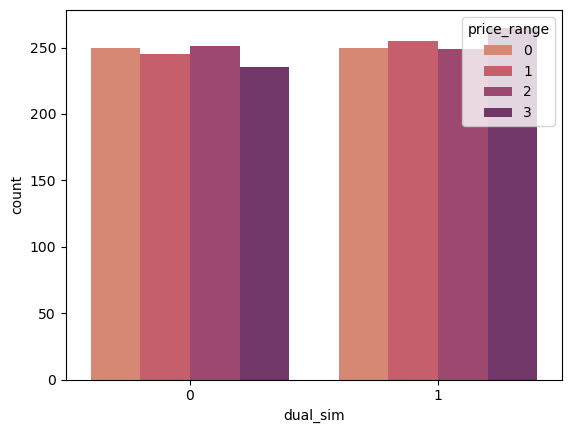

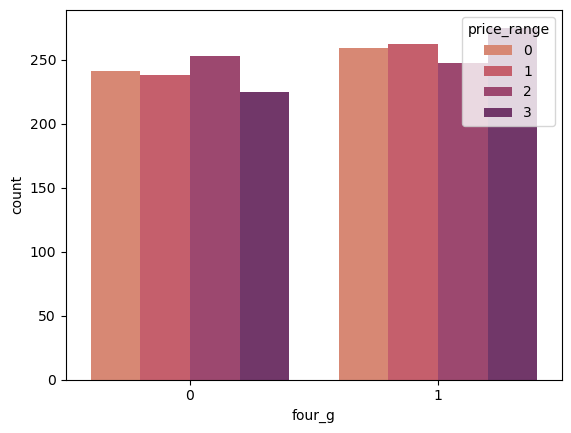

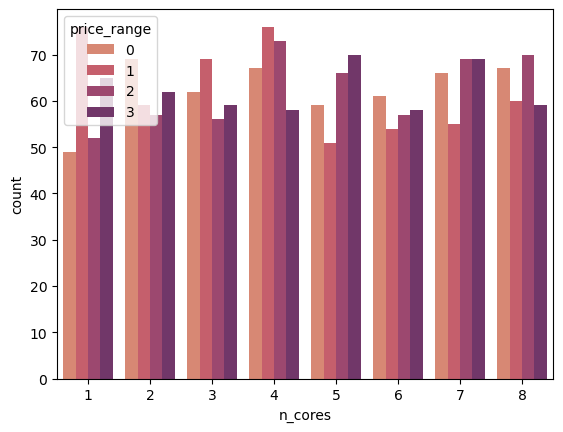

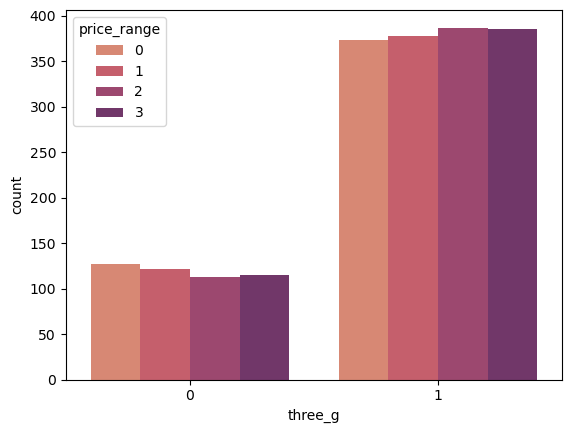

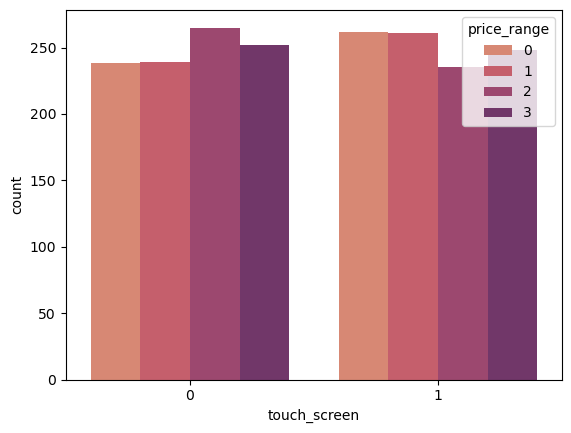

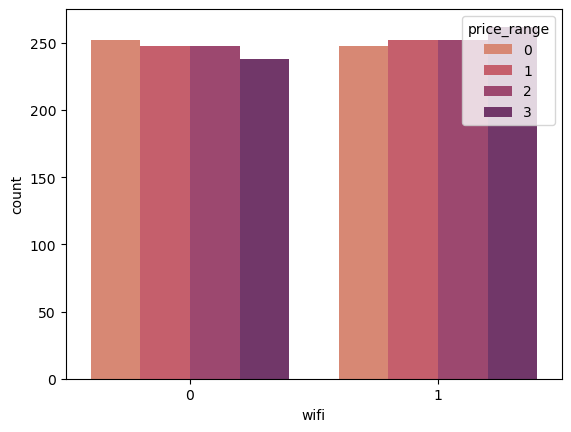

In [18]:
for i in cat:
    sns.countplot(x = i, data = df,palette="flare",hue = 'price_range')
    plt.show()

# MODEL TRAINING

In [19]:
X = df.drop('price_range',axis = 1)
y = df['price_range']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test, test_size=0.5)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [23]:
def model_eval(model,X_train, X_test, y_train, y_test,grid = {},cv = False):
    
    if cv:
        model = GridSearchCV(model,param_grid = grid)
        
    model.fit(X_train,y_train)
    print("Metrix for training data \n")
    y_pred = model.predict(X_train)
    print(classification_report(y_train,y_pred))
    print("Metrix for test data \n")
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print("Confusion metrix for test data\n")
    cm = confusion_matrix(y_test,y_pred)
    pcm = ConfusionMatrixDisplay(cm)
    pcm.plot()
    plt.show()
    return model
    

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

Metrix for training data 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       357
           1       0.97      0.96      0.97       344
           2       0.97      0.97      0.97       353
           3       0.99      0.99      0.99       346

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400

Metrix for test data 

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.94      0.93      0.94        90
           2       0.93      0.89      0.91        63
           3       0.95      0.99      0.97        81

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300

Confusion metrix for test data



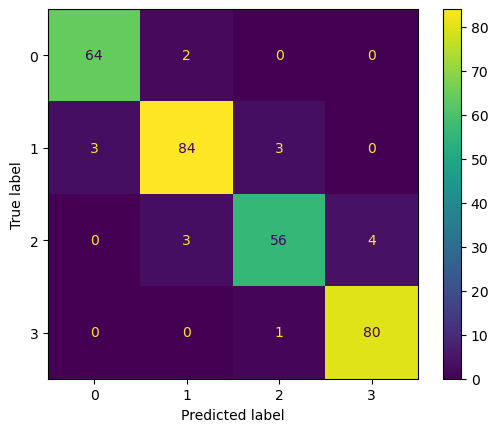

LogisticRegression()

In [25]:
model = LogisticRegression()
model_eval(model,scaled_X_train,scaled_X_val,y_train,y_val)

Metrix for training data 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       357
           1       0.98      0.99      0.99       344
           2       0.98      0.97      0.98       353
           3       0.99      0.99      0.99       346

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400

Metrix for test data 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        66
           1       0.89      0.78      0.83        90
           2       0.72      0.87      0.79        63
           3       0.95      0.93      0.94        81

    accuracy                           0.87       300
   macro avg       0.87      0.88      0.87       300
weighted avg       0.88      0.87      0.87       300

Confusion metrix for test data



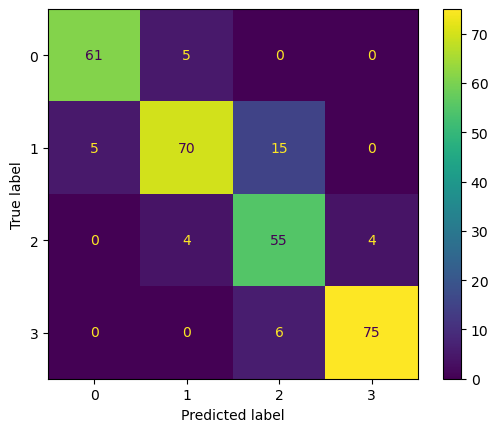

SVC()

In [26]:
model = SVC()
model_eval(model,scaled_X_train,scaled_X_val,y_train,y_val)

Metrix for training data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       344
           2       1.00      1.00      1.00       353
           3       1.00      1.00      1.00       346

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

Metrix for test data 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        66
           1       0.91      0.79      0.85        90
           2       0.82      0.86      0.84        63
           3       0.93      0.95      0.94        81

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

Confusion metrix for test data



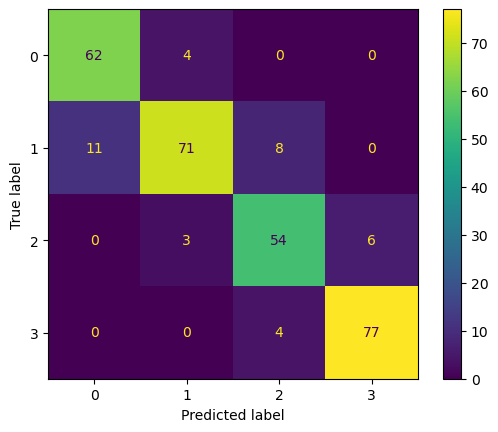

RandomForestClassifier()

In [27]:
model = RandomForestClassifier()
model_eval(model,scaled_X_train,scaled_X_val,y_train,y_val)

Metrix for training data 

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       357
           1       0.57      0.62      0.59       344
           2       0.62      0.60      0.61       353
           3       0.85      0.67      0.75       346

    accuracy                           0.69      1400
   macro avg       0.69      0.68      0.69      1400
weighted avg       0.69      0.69      0.69      1400

Metrix for test data 

              precision    recall  f1-score   support

           0       0.55      0.71      0.62        66
           1       0.41      0.38      0.40        90
           2       0.31      0.38      0.34        63
           3       0.80      0.54      0.65        81

    accuracy                           0.50       300
   macro avg       0.52      0.50      0.50       300
weighted avg       0.53      0.50      0.50       300

Confusion metrix for test data



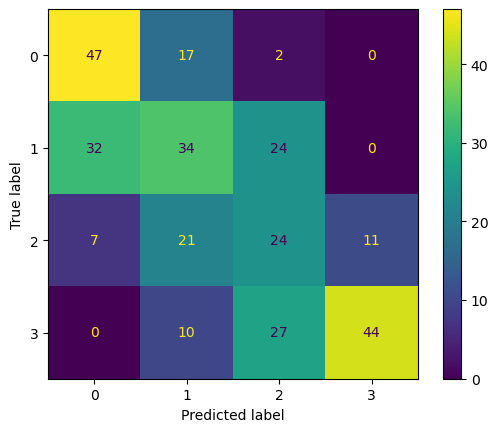

KNeighborsClassifier()

In [28]:
model = KNeighborsClassifier()
model_eval(model,scaled_X_train,scaled_X_val,y_train,y_val)

Metrix for training data 

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       357
           1       0.66      0.79      0.72       344
           2       0.48      0.87      0.62       353
           3       0.86      0.22      0.35       346

    accuracy                           0.65      1400
   macro avg       0.74      0.64      0.62      1400
weighted avg       0.74      0.65      0.62      1400

Metrix for test data 

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        66
           1       0.75      0.78      0.77        90
           2       0.42      0.89      0.57        63
           3       0.74      0.21      0.33        81

    accuracy                           0.63       300
   macro avg       0.70      0.64      0.61       300
weighted avg       0.71      0.63      0.61       300

Confusion metrix for test data



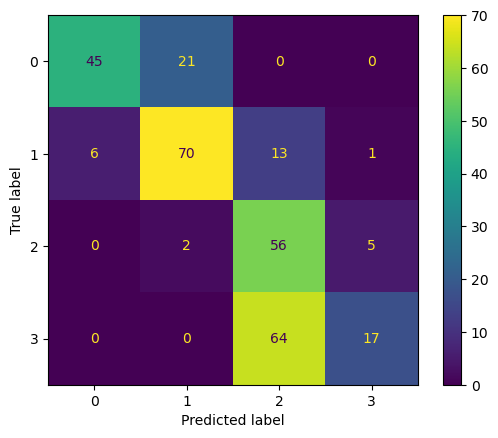

AdaBoostClassifier()

In [29]:
model = AdaBoostClassifier()
model_eval(model,scaled_X_train,scaled_X_val,y_train,y_val)

### LET US TUNE HYPERPARAMETERS FOR LOGISTIC REGRESSION

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Metrix for training data 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       356
           1       0.99      0.98      0.99       357
           2       0.98      0.99      0.98       340
           3       0.99      0.99      0.99       347

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400

Metrix for test data 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       144
           1       0.95      0.94      0.94       143
           2       0.97      0.95      0.96       160
           3       0.97      1.00      0.99       153

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

Confusion metrix for test data



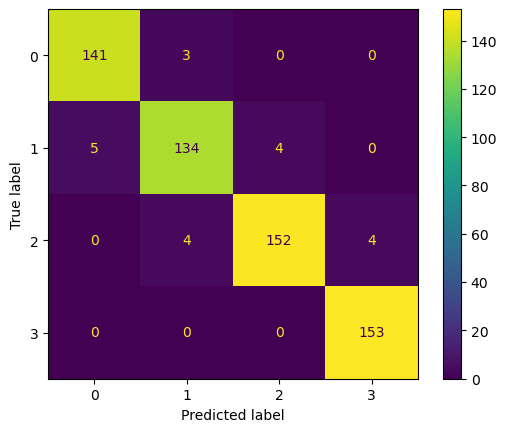

In [31]:
model = LogisticRegression()
grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [.01,.1,1,2,10,50,100],
    'l1_ratio' : [.01,.1,.2,.5,.7,.9,.99],
    'max_iter' : [10000] 
    }
import warnings

with warnings.catch_warnings(record=True):
    model = model_eval(model,scaled_X_train,scaled_X_test,y_train,y_test,grid,True)

In [32]:
model.best_params_

{'C': 50, 'l1_ratio': 0.01, 'max_iter': 10000, 'penalty': 'l2'}